Source: https://github.com/Lisa-Ho/30-day-map-challenge/blob/main/2022/Day2/Amsterdam_highways.ipynb

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
from matplotlib import font_manager

/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_199/1427362118.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pyg

### Gathering data

In [2]:
 water_tags = {'water': True,
            'natural': ['water', 'bay', 'spring', 'strait', 'wetland'],
            'place': ['sea', 'ocean'],
            'waterway': [
             'river', 'stream', 'tidal_channel', 'canal', 
            'drain', 'ditch', 'fairway']}

In [3]:
places = ['Central Administrative Okrug',
 'Northern Administrative Okrug',
 'North-Eastern Administrative Okrug',
 'Eastern Administrative Okrug',
 'South-Eastern Administrative Okrug',
 'Southern Administrative Okrug',
 'South-Western Administrative Okrug',
 'Western Administrative Okrug',
 'North-Western Administrative Okrug',
 'Zelenogradsky Administrative Okrug',
 'Novomoskovsky Administrative Okrug',
 'Troitsky Administrative Okrug']
local_crs = 32637

In [4]:
place = places[0] + ', Moscow'

In [5]:
water = ox.geometries_from_place(place, tags=water_tags)

### Roads

In [6]:
roads = ox.graph_from_place(place,network_type='drive')

In [7]:
# Prepare roads data
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in roads.edges(keys=True, data=True): # added ww
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)

### Cycleways

In [8]:
def get_cycleways_place(city_name): 
    
    # Configuring osmnx
    useful_tags = ox.settings.useful_tags_way + ['cycleway']
    ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)
    
    # Querying for roads and bike trails
    cycleways = ox.graph_from_place(city_name, network_type='bike', simplify=False)
    
    # Finding all non-cycleways in the network
    non_cycleways = [(u, v, k) for  u, v, k, d  in  cycleways.edges(keys=True, data=True) if  not ('cycleway'  in  d  or  d['highway']=='cycleway')]
   
    # Remove non-cycleways and isolated nodes
    cycleways.remove_edges_from(non_cycleways)
    cycleways = ox.utils_graph.remove_isolated_nodes(cycleways)
    
    return cycleways

In [11]:
# cycleways = get_cycleways_place(place)
# import networkx as nx
# nx.draw(cycleways)

/srv/conda/envs/notebook/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


### Roads network

In [ ]:
#define colours and width by road type
roadwidth = []
roadcols = []
for item in data:    
    if "highway" in item.keys():
        if item["highway"] == "primary":
            width = 2
            color = "white"
        if item["highway"] == "secondary" or item["highway"] == "tertiary":
            width = 1  
            color = "#ABABAB"
        else:
            width =  0.2
            color = "#888888"
    else:
        width = 0.2
        color = "#888888"
    roadwidth.append(width)
    roadcols.append(color)

In [ ]:
#Plot roads network
fig, ax = plt.subplots(figsize=(12,7), layout="tight")
fig.set_facecolor("#111111")
ax.set_facecolor("#111111")

#set boundaries

north = 55.8057432
south = 55.6834513
east =  37.4800361
west = 37.7352833

#plot roads and water
ox.plot_graph(roads, ax=ax, node_size=0, edge_color=roadcols, edge_linewidth=roadwidth, bbox = (north, south,west,east),
              show=False, close=False)
ox.plot_footprints(water, ax=ax, color='#6da5b7',alpha=1, bbox = (north, south, west,east),
            show=False, close=False)
#6da5b7
#59788f
#3e7c94
#title and footer
plt.figtext(0.18,0.89,'Moscow', fontsize = 50, color='white') #, fontproperties=title_font)
plt.figtext(0.13,0.025,'Data: OSM', fontsize = 9, color='#ABABAB') #,fontproperties=label_font)

#save
plt.savefig("moscow-road-network.png", dpi=300, bbox_inches="tight", pad_inches=0.1)

plt.show()

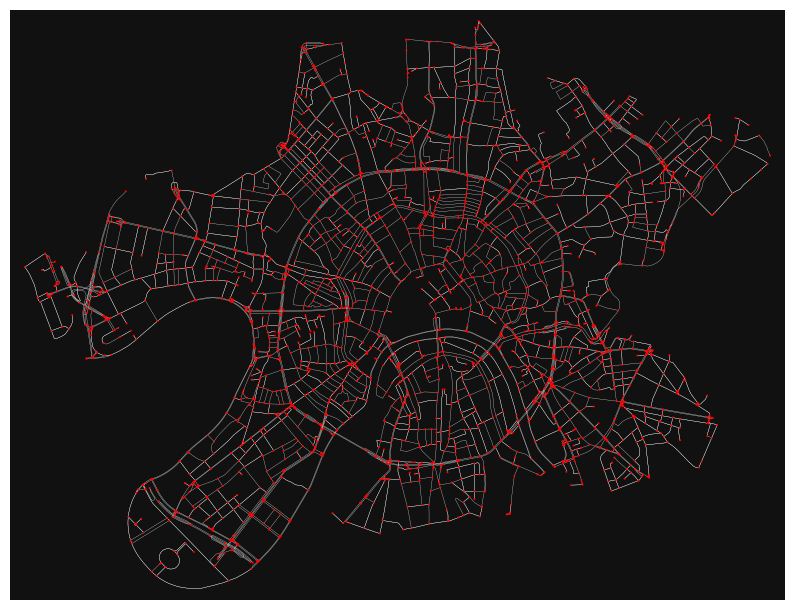

In [18]:
fig, ax = ox.plot_graph(roads, node_size=2, node_color='r', edge_color='w', edge_linewidth=0.2, figsize=(10,10))

In [19]:
ox.folium.plot_graph_folium(roads)

In [42]:
import networkx as nx

In [47]:
print(f'Number of edges: {nx.number_of_edges(G)} & nodes: {nx.number_of_nodes(G)}')

Number of edges: 4693 & nodes: 3095


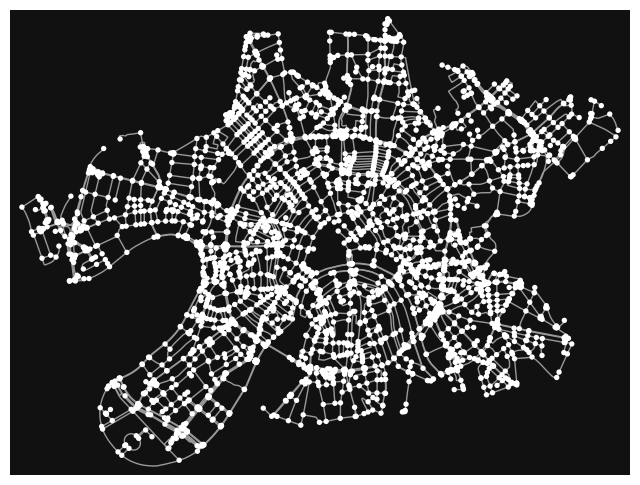

In [45]:
fig, ax = ox.plot_graph(G)